In [1]:
!pip install openfret

# Example 1

Saving dataset with one trace into OpenFRET format.

In [2]:
from openfret import Dataset, Trace, Channel, Metadata, write_data
from datetime import date

# Create Channel objects
channel1 = Channel("donor", [10.0, 12.0, 15.0], excitation_wavelength=488.0, emission_wavelength=520.0)
channel2 = Channel("acceptor", [2.0, 5.0, 8.0], excitation_wavelength=532.0, emission_wavelength=580.0)

# Create a Trace object
trace1 = Trace([channel1, channel2], metadata=Metadata({"molecule_id": "1"}))

# Create a Dataset object
dataset = Dataset(
    title="My FRET Experiment",
    traces=[trace1],
    description="FRET data of protein folding",
    experiment_type="2-Color FRET",
    authors=["John Doe", "Jane Smith"],
    institution="University X",
    date=date(2024, 1, 1),
    metadata=Metadata({"experiment_id": "20240101_JD_JS_1", "movie_file": "20240101_CoolExperiment.TIF"}),
    sample_details={"buffer_conditions": "Phosphate buffer", "other_details": Metadata({"ph": 7.4})}, #Example of nested metadata
    instrument_details={"microscope": "Olympus IX83", "other_details": Metadata({"objective": "60x oil 1.5 NA"})}, #Example of nested metadata
)

# Write the dataset to a JSON file
write_data(dataset, "fret_data.json", compress=True)  # When compressed, we append .zip to the filename

# Example 2

Saving dataset with multiple traces into OpenFRET format.

In [4]:
import numpy as np

In [5]:
traces = []

for i in range(1000):
  donor = np.random.uniform(size=(1000,))
  acceptor = np.random.uniform(size=(1000,))
  traces.append(Trace([Channel("donor", donor), Channel("acceptor", acceptor)]))

# Create a Dataset object
dataset = Dataset(
    title="My FRET Experiment",
    traces=traces,
    description="FRET data of protein folding",
    experiment_type="2-Color FRET",
    authors=["John Doe", "Jane Smith"],
    institution="University X",
    date=date(2024, 1, 1),
    metadata=Metadata({"experiment_id": "20240101_JD_JS_1", "movie_file": "20240101_CoolExperiment.TIF"}),
    sample_details={"buffer_conditions": "Phosphate buffer", "other_details": Metadata({"ph": 7.4})}, #Example of nested metadata
    instrument_details={"microscope": "Olympus IX83", "other_details": Metadata({"objective": "60x oil 1.5 NA"})}, #Example of nested metadata
)

# Write the dataset to a JSON file
write_data(dataset, "fret_data_large_dataset.json", compress=True)

# Example 3

Loading dataset with OpenFRET.

In [9]:
from openfret import read_data
import matplotlib.pyplot as plt

dataset = read_data("fret_data_large_dataset.json.zip")

That's it! We will plot a few example traces.

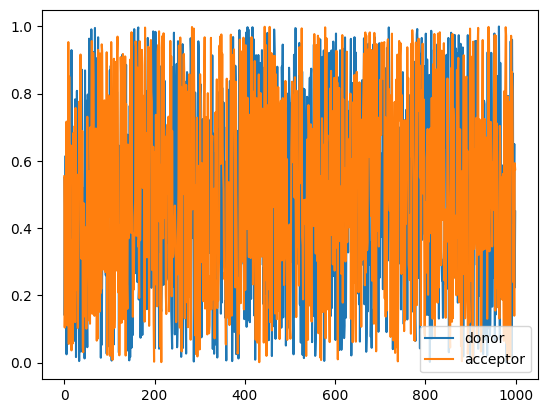

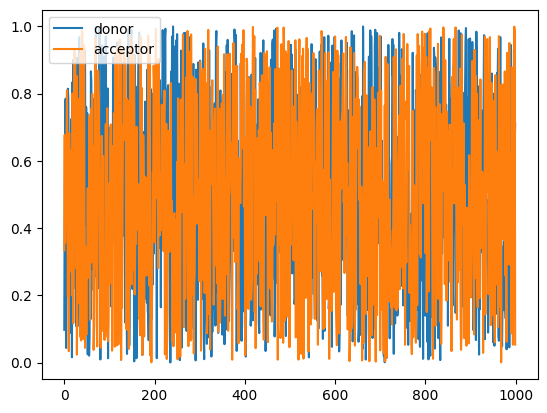

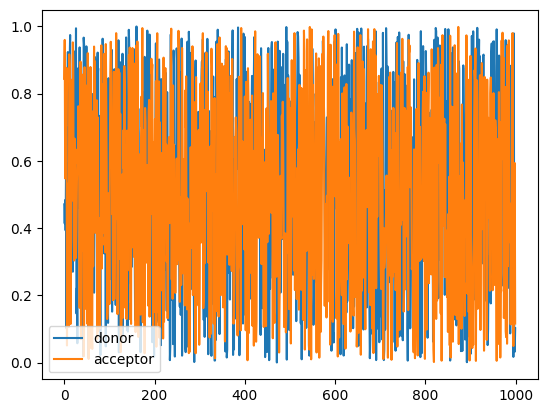

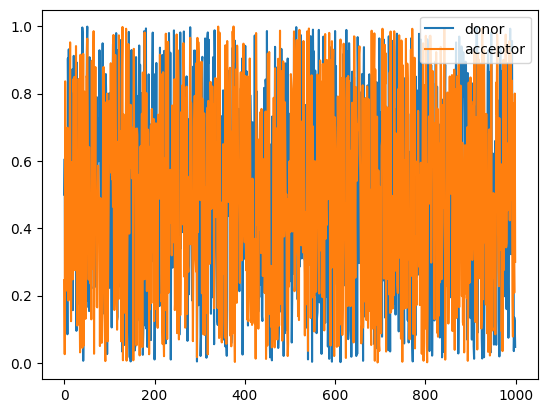

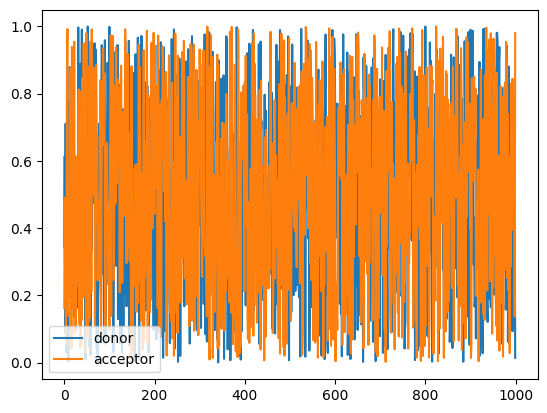

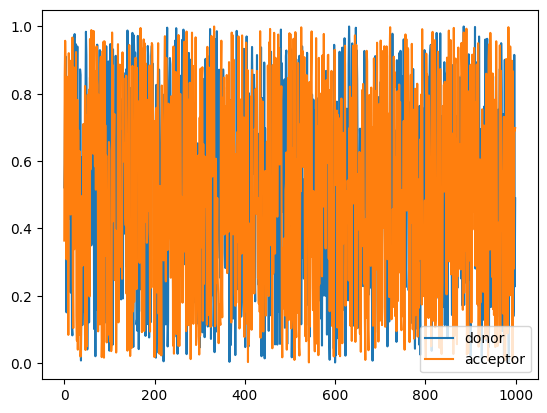

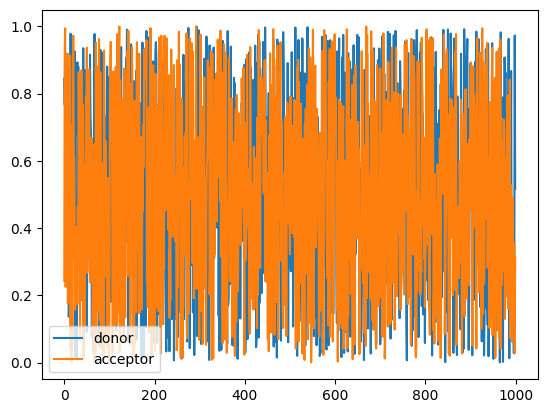

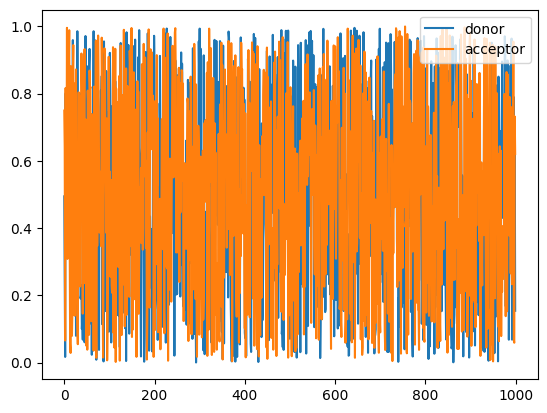

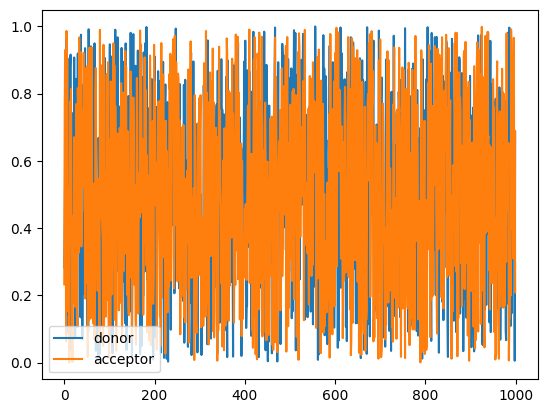

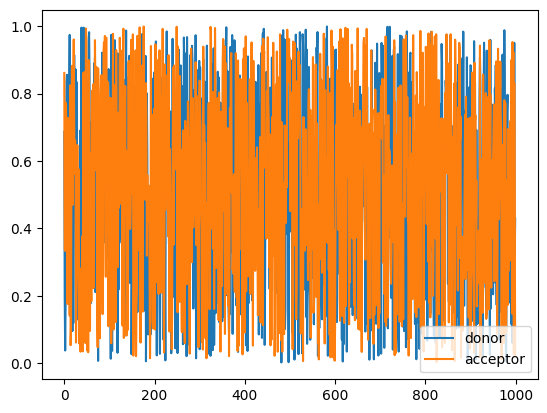

In [11]:
for i in range(10):
  for channel in dataset.traces[i].channels:
    plt.plot(channel.data, label=channel.channel_type)
  plt.legend()
  plt.show()